![DecayLanguage](../images/DecayLanguage.png)

### Henry Schreiner and Eduardo Rodrigues

The demos assume you have run `python -m pip install decaylanguage`. The demos use Python 3, though the package also supports Python 2 for now. You can also [access them on binder](https://mybinder.org/v2/gh/scikit-hep/decaylanguage/master?urlpath=lab/tree/notebooks/DecayLanguageDemo.ipynb) or [view them here](https://nbviewer.jupyter.org/github/scikit-hep/decaylanguage/blob/master/notebooks/DecayLanguageDemo.ipynb).

`DecayLanguage` was designed to support manipulating decay structures in Python. It started with a specific focus, and is slowly generalizing. The current package has:

* **Amplitude Analysis decay language**:
    - Input based on AmpGen generator
    - Current output formats:
        * GooFit C++
* **Decay file parsers**:
    - Read DecFiles, such as the LHCb master DecFile
    - Manipulate and visualize them in Python

## DecayLanguage: decay modelling

This takes a file in the **"AmpGen" format** and converts it to a DecayChain. Currently one output converter is included: **GooFit C++**.

In [1]:
with open("simple_model.txt") as f:
    print(f.read())

EventType D0 K- pi+ pi+ pi-

D0[D]{K*(892)bar0{K-,pi+},rho(770)0{pi+,pi-}}              2 1         0          2 0         0
D0[D]{rho(1450)0{pi+,pi-},K*(892)bar0{K-,pi+}}             0 0.648936  0.0205762  0 -0.271637 0.0342107
D0[P]{K*(892)bar0{K-,pi+},rho(770)0{pi+,pi-}}              0 0.362058  0.00237314 0 -1.79607  0.00663691
D0[P]{rho(1450)0{pi+,pi-},K*(892)bar0{K-,pi+}}             0 0.642781  0.00570074 0 1.69828   0.00900026

D0_radius                                         2              0.0037559      0



In [2]:
!python -m decaylanguage -G goofit simple_model.txt

/* Autogenerated file by AmpGen2GooFit
Generated on  2020-12-11 08:00:21.034295


DtoV1V2_V1toP1P2_V2toP3P4_P : SF_4Body.DtoV1V2_V1toP1P2_V2toP3P4_P SF_4Body.FF_12_34_L1
  D0[P]{K*(892)~0{K-,pi+},rho(770)0{pi+,pi-}}
  D0[P]{rho(1450)0{pi+,pi-},K*(892)~0{K-,pi+}}
DtoV1V2_V1toP1P2_V2toP3P4_D : SF_4Body.DtoV1V2_V1toP1P2_V2toP3P4_D SF_4Body.FF_12_34_L2
  D0[D]{K*(892)~0{K-,pi+},rho(770)0{pi+,pi-}}
  D0[D]{rho(1450)0{pi+,pi-},K*(892)~0{K-,pi+}}


      Scalar:
PseudoScalar: pi+         pi-         K-          D0         
      Vector: rho(770)0   K*(892)~0   rho(1450)0 
       Axial:
      Tensor:
PseudoTensor:
     Unknown:
  NonDefined:


 0 D0[D]{K*(892)~0{K-,pi+},rho(770)0{pi+,pi-}}                            spinfactors: 2  L: 2 [0.0-2.0]
 1 D0[D]{rho(1450)0{pi+,pi-},K*(892)~0{K-,pi+}}                           spinfactors: 2  L: 2 [0.0-2.0]
 2 D0[P]{K*(892)~0{K-,pi+},rho(770)0{pi+,pi-}}                            spinfactors: 2  L: 1 [0.0-2.0]
 3 D0[P]{rho(1450)0{pi+,pi-},K*(892)~0{K-

You can query this information from Python too:

In [3]:
from decaylanguage.modeling.goofit import GooFitChain

In [4]:
lines, all_states = GooFitChain.read_ampgen("simple_model.txt")

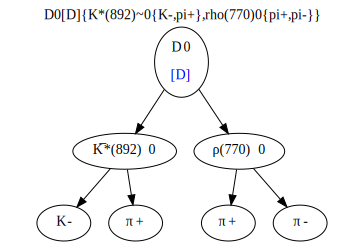

In [5]:
lines[0]

## DecayLanguage: DecFile

**_Under development, syntax may change_.**

In [6]:
from decaylanguage import DecFileParser
from decaylanguage.dec.dec import ChargeConjugateReplacement

In [7]:
with open("../tests/data/test_example_Dst.dec") as f:
    print(f.read())

# Example decay chain for testing purposes
# Considered by itself, this file in in fact incomplete,
# as there are no instructions on how to decay the anti-D0 and the D-!

Decay D*+
0.6770    D0  pi+                    VSS;
0.3070    D+  pi0                    VSS;
0.0160    D+  gamma                  VSP_PWAVE;
Enddecay

Decay D*-
0.6770    anti-D0  pi-                VSS;
0.3070    D-       pi0                VSS;
0.0160    D-       gamma              VSP_PWAVE;
Enddecay

Decay D0
1.0   K-      pi+                  PHSP;
Enddecay

Decay D+
1.0   K-   pi+   pi+   pi0    PHSP;
Enddecay

Decay pi0
0.988228297   gamma   gamma                   PHSP;
0.011738247   e+      e-      gamma           PI0_DALITZ;
0.000033392   e+      e+      e-      e-      PHSP;
0.000000065   e+      e-                      PHSP;
Enddecay



In [8]:
parser = DecFileParser("../tests/data/test_example_Dst.dec")
parser

<DecFileParser: decfile(s)=['../tests/data/test_example_Dst.dec']>

In [9]:
parser.parse()
parser

<DecFileParser: decfile(s)=['../tests/data/test_example_Dst.dec'], n_decays=5>

In [10]:
parser.print_decay_modes("D*+")

       0.677 : D0  pi+                                                        VSS 
       0.307 : D+  pi0                                                        VSS 
       0.016 : D+  gamma                                                VSP_PWAVE 


In [11]:
parser.list_decay_mother_names()

['D*+', 'D*-', 'D0', 'D+', 'pi0']

In [12]:
parser.list_decay_modes("D*+")

[['D0', 'pi+'], ['D+', 'pi0'], ['D+', 'gamma']]

### Viewing decay chains

In [13]:
from decaylanguage import DecayChainViewer

In [14]:
d = parser.build_decay_chains("D+")
d

{'D+': [{'bf': 1.0,
   'fs': ['K-',
    'pi+',
    'pi+',
    {'pi0': [{'bf': 0.988228297,
       'fs': ['gamma', 'gamma'],
       'model': 'PHSP',
       'model_params': ''},
      {'bf': 0.011738247,
       'fs': ['e+', 'e-', 'gamma'],
       'model': 'PI0_DALITZ',
       'model_params': ''},
      {'bf': 3.3392e-05,
       'fs': ['e+', 'e+', 'e-', 'e-'],
       'model': 'PHSP',
       'model_params': ''},
      {'bf': 6.5e-08,
       'fs': ['e+', 'e-'],
       'model': 'PHSP',
       'model_params': ''}]}],
   'model': 'PHSP',
   'model_params': ''}]}

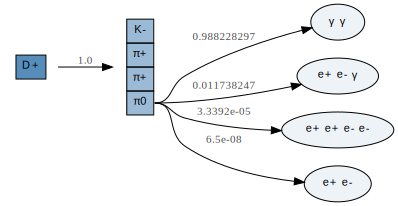

In [15]:
DecayChainViewer(d)

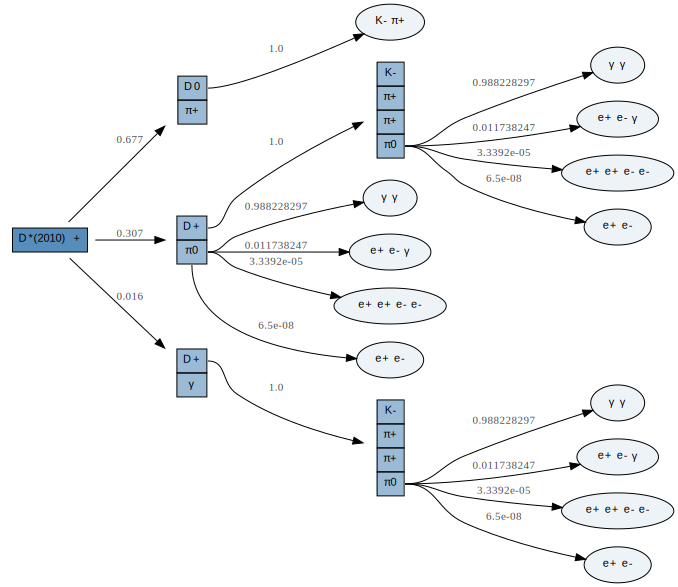

In [16]:
d = parser.build_decay_chains("D*+")
DecayChainViewer(d)

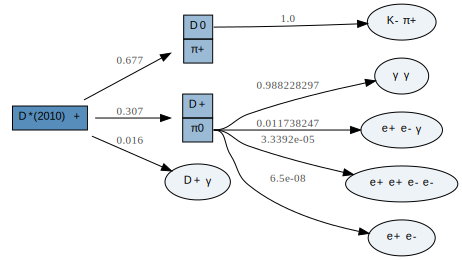

In [17]:
d = parser.build_decay_chains("D*+", stable_particles=["D+"])
DecayChainViewer(d)

#### Charge conjugation:

In [18]:
ChargeConjugateReplacement().visit(parser._parsed_dec_file.children[0])

Tree(decay, [Tree(particle, [Token(LABEL, 'D*-')]), Tree(decayline, [Tree(value, [Token(SIGNED_NUMBER, '0.6770')]), Tree(particle, [Token(LABEL, 'anti-D0')]), Tree(particle, [Token(LABEL, 'pi-')]), Tree(model, [Token(MODEL_NAME, 'VSS')])]), Tree(decayline, [Tree(value, [Token(SIGNED_NUMBER, '0.3070')]), Tree(particle, [Token(LABEL, 'D-')]), Tree(particle, [Token(LABEL, 'pi0')]), Tree(model, [Token(MODEL_NAME, 'VSS')])]), Tree(decayline, [Tree(value, [Token(SIGNED_NUMBER, '0.0160')]), Tree(particle, [Token(LABEL, 'D-')]), Tree(particle, [Token(LABEL, 'gamma')]), Tree(model, [Token(MODEL_NAME, 'VSP_PWAVE')])])])

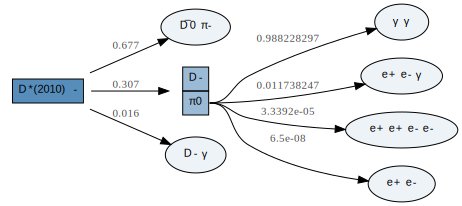

In [19]:
d = parser.build_decay_chains("D*-")
DecayChainViewer(d)

### Large DecFiles

Now let's read in a 11,000 line dec file - LHCb master file with generic decays.

In [20]:
parser = DecFileParser("../src/decaylanguage/data/DECAY_LHCB.DEC")
parser

<DecFileParser: decfile(s)=['../decaylanguage/data/DECAY_LHCB.DEC']>

In [21]:
%%time
parser.parse()
parser

CPU times: user 1.99 s, sys: 95.7 ms, total: 2.09 s
Wall time: 2.08 s


<DecFileParser: decfile(s)=['../decaylanguage/data/DECAY_LHCB.DEC'], n_decays=506>

In [22]:
parser.dict_aliases()

{'K*L': 'K*0',
 'K*S': 'K*0',
 'K*BL': 'anti-K*0',
 'K*BS': 'anti-K*0',
 'K*0T': 'K*0',
 'anti-K*0T': 'anti-K*0',
 'K*BR': 'anti-K*0',
 'K*0R': 'K*0',
 'anti-K_0*0N': 'anti-K_0*0',
 'K_0*0N': 'K_0*0',
 'B0sig': 'B0',
 'anti-B0sig': 'anti-B0',
 'B+sig': 'B+',
 'B-sig': 'B-',
 'B_s0sig': 'B_s0',
 'anti-B_s0sig': 'anti-B_s0',
 'B_c+sig': 'B_c+',
 'B_c-sig': 'B_c-',
 'eta_bsig': 'eta_b',
 'h_bsig': 'h_b',
 'Sigma_b-sig': 'Sigma_b-',
 'anti-Sigma_b+sig': 'anti-Sigma_b+',
 'Lambda_b0sig': 'Lambda_b0',
 'anti-Lambda_b0sig': 'anti-Lambda_b0',
 'Omega_b-sig': 'Omega_b-',
 'anti-Omega_b+sig': 'anti-Omega_b+',
 'Xi_b-sig': 'Xi_b-',
 'anti-Xi_b+sig': 'anti-Xi_b+',
 'Xi_b0sig': 'Xi_b0',
 'anti-Xi_b0sig': 'anti-Xi_b0',
 'eta_csig': 'eta_c',
 'J/psisig': 'J/psi',
 'chi_c0sig': 'chi_c0',
 'chi_c1sig': 'chi_c1',
 'chi_c2sig': 'chi_c2',
 'psi(2S)sig': 'psi(2S)',
 'psi(3770)sig': 'psi(3770)',
 'D*+sig': 'D*+',
 'D*-sig': 'D*-',
 'D*0sig': 'D*0',
 'anti-D*0sig': 'anti-D*0',
 'D0sig': 'D0',
 'anti-D0sig': 

In [23]:
parser.dict_charge_conjugates()

{'K*L': 'K*BL',
 'K*S': 'K*BS',
 'K*0T': 'anti-K*0T',
 'K_0*0N': 'anti-K_0*0N',
 'K*0R': 'K*BR',
 'B0sig': 'anti-B0sig',
 'B+sig': 'B-sig',
 'B_s0sig': 'anti-B_s0sig',
 'B_c+sig': 'B_c-sig',
 'eta_bsig': 'eta_bsig',
 'h_bsig': 'h_bsig',
 'Sigma_b-sig': 'anti-Sigma_b+sig',
 'Lambda_b0sig': 'anti-Lambda_b0sig',
 'Omega_b-sig': 'anti-Omega_b+sig',
 'Xi_b-sig': 'anti-Xi_b+sig',
 'Xi_b0sig': 'anti-Xi_b0sig',
 'eta_csig': 'eta_csig',
 'J/psisig': 'J/psisig',
 'chi_c0sig': 'chi_c0sig',
 'chi_c1sig': 'chi_c1sig',
 'chi_c2sig': 'chi_c2sig',
 'psi(2S)sig': 'psi(2S)sig',
 'psi(3770)sig': 'psi(3770)sig',
 'D*+sig': 'D*-sig',
 'D*0sig': 'anti-D*0sig',
 'D0sig': 'anti-D0sig',
 'D+sig': 'D-sig',
 'D_s+sig': 'D_s-sig',
 'Lambda_c+sig': 'anti-Lambda_c-sig',
 'tau+sig': 'tau-sig',
 'Upsilonsig': 'Upsilonsig',
 'Upsilon(2S)sig': 'Upsilon(2S)sig',
 'Upsilon(3S)sig': 'Upsilon(3S)sig',
 'Upsilon(4S)sig': 'Upsilon(4S)sig',
 'Upsilon(5S)sig': 'Upsilon(5S)sig',
 'X_1(3872)sig': 'X_1(3872)sig',
 'h_csig': 'h_cs

Stay tuned, follow the development and/or contribute!